In [1]:
import sys, os, time
import shutil
# %pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision
# from IPython.display import Image, Pretty, TextDisplayObject, Video
from IPython import display as disp
from IPython.display import display
from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image
from contextlib import nullcontext, redirect_stdout, redirect_stderr
#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [2]:
M = Hybrid_Controller('/is/ei/fleeb/workspace/media/hybrid/final').filter_strs('!test')

Found 127 runs


In [3]:
import os
root = '/is/ei/fleeb/workspace/media/hybrid/final'

In [4]:
dirs = []
for r in os.listdir(root):
    if 'viz' in os.listdir(os.path.join(root, r)):
        print(r)
        dirs.append(r)

3dshapes-ae_0030-6046949-00_200131-125923_ckpt30
3dshapes-ae_0035-6048636-02_200131-185834_ckpt30
3dshapes-dae_0030-6046949-02_200131-125904_ckpt30
3dshapes-dae_0035-6048636-06_200131-185348_ckpt30
3dshapes-fae_0031-6046954-00_200131-132552_ckpt30
3dshapes-fae_0035-6048636-07_200131-185701_ckpt30
3dshapes-fvae_0029-6046947-06_200131-125026_ckpt30
3dshapes-fvae_0035-6048636-08_200131-185352_ckpt30
3dshapes-fwae_0028-6046939-05_200131-124815_ckpt30
3dshapes-vae_0028-6046939-02_200131-124807_ckpt30
3dshapes-vae_0028-6046939-03_200131-124821_ckpt30
3dshapes-vae_0035-6048636-04_200131-185348_ckpt30
3dshapes-vae_0035-6048636-05_200131-185514_ckpt30
3dshapes-wae_0028-6046939-01_200131-124832_ckpt30
3dshapes-wae_0035-6048636-03_200131-185353_ckpt30
box-s3-ae_0074-6051172-00_200202-205115_ckpt51
box-s3-dae_0079-6051322-01_200203-020055_ckpt51
box-s3-fae_0074-6051172-04_200202-211819_ckpt51
box-s3-fvae_0074-6051172-06_200202-211800_ckpt51
box-s3-fwae_0074-6051172-05_200202-211800_ckpt51
box-s3-v

In [5]:
len(dirs)

127

In [6]:
# import tarfile, shutil
# import os.path

In [7]:
# for d in dirs:
#     if 'traversals' in os.listdir(os.path.join(root, d, 'viz')):
#         # find walks dirs
#         path = os.path.join(root, d, 'viz', 'traversals')
#         walks = [n for n in os.listdir(path) if os.path.isdir(os.path.join(path,n))]
#         if len(walks):
#             print(d, len(walks))
#             tarpath = os.path.join(path, 'frames.tar.gz')
#             with tarfile.open(tarpath, 'w:gz') as tar:
#                 for w in walks:
#                     tar.add(os.path.join(path,w))#, arcname=os.path.basename(tarpath))
#             print('\tsaved', tarpath)
            
#             # remove uncompressed
#             for w in walks:
#                 shutil.rmtree(os.path.join(path,w))
#             print('\tcleaned')

box-s3-ae_0074-6051172-00_200202-205115_ckpt51 16
	saved /is/ei/fleeb/workspace/media/hybrid/final/box-s3-ae_0074-6051172-00_200202-205115_ckpt51/viz/traversals/frames.tar.gz
	cleaned
box-s3-dae_0079-6051322-01_200203-020055_ckpt51 16
	saved /is/ei/fleeb/workspace/media/hybrid/final/box-s3-dae_0079-6051322-01_200203-020055_ckpt51/viz/traversals/frames.tar.gz
	cleaned
box-s3-fae_0074-6051172-04_200202-211819_ckpt51 16
	saved /is/ei/fleeb/workspace/media/hybrid/final/box-s3-fae_0074-6051172-04_200202-211819_ckpt51/viz/traversals/frames.tar.gz
	cleaned
box-s3-fvae_0074-6051172-06_200202-211800_ckpt51 16
	saved /is/ei/fleeb/workspace/media/hybrid/final/box-s3-fvae_0074-6051172-06_200202-211800_ckpt51/viz/traversals/frames.tar.gz
	cleaned
box-s3-fwae_0074-6051172-05_200202-211800_ckpt51 16
	saved /is/ei/fleeb/workspace/media/hybrid/final/box-s3-fwae_0074-6051172-05_200202-211800_ckpt51/viz/traversals/frames.tar.gz
	cleaned
box-s3-vae_0074-6051172-02_200202-205747_ckpt51 16
	saved /is/ei/fle

	saved /is/ei/fleeb/workspace/media/hybrid/final/celeba-fdwae_0051-6050322-11_200201-212849_ckpt40/viz/traversals/frames.tar.gz
	cleaned
spaceinv-ae_0064-6050849-00_200202-183950_ckpt40 8
	saved /is/ei/fleeb/workspace/media/hybrid/final/spaceinv-ae_0064-6050849-00_200202-183950_ckpt40/viz/traversals/frames.tar.gz
	cleaned
spaceinv-dvae_0064-6050849-08_200202-190947_ckpt40 8
	saved /is/ei/fleeb/workspace/media/hybrid/final/spaceinv-dvae_0064-6050849-08_200202-190947_ckpt40/viz/traversals/frames.tar.gz
	cleaned
spaceinv-dwae_0064-6050849-09_200202-190951_ckpt40 8
	saved /is/ei/fleeb/workspace/media/hybrid/final/spaceinv-dwae_0064-6050849-09_200202-190951_ckpt40/viz/traversals/frames.tar.gz
	cleaned
spaceinv-fdwae_0064-6050849-10_200202-190944_ckpt40 8
	saved /is/ei/fleeb/workspace/media/hybrid/final/spaceinv-fdwae_0064-6050849-10_200202-190944_ckpt40/viz/traversals/frames.tar.gz
	cleaned
spaceinv-fdwae_0064-6050849-11_200202-190944_ckpt40 8
	saved /is/ei/fleeb/workspace/media/hybrid/fina

In [8]:
final_jobs = {
    'box-s3': {'ae':'74-0', 'wae':'74-1', 'vae':'74-2', 'bvae':'74-3', 'fae':'74-4', 'fwae':'74-5', 
               'fvae':'74-6', 'dae':'79-1', },
    'nocap2cap': {'ae':'86-0', 'wae':'86-1', 'vae':'86-2', 'bvae':'86-3', 'fae':'99-0', 'dae':'99-1', 
                  'fwae':'86-4', 'fvae':'86-5', },
    'spaceinv': {'wae':'64-1', '4vae':'64-3', 'fwae':'64-5', 'fvae':'64-7', 'ae':'64-0', 'vae':'64-2', 
                 '16vae':'64-4', 'fwaes':'64-6', 'fdwaes':'64-11', 'fdwae':'64-10', 'dvae':'64-8', 'dwae':'64-9'},
    '3dshapes': {'ae':'30-0','wae':'28-1', 'vae':'28-2', 'bvae':'28-3', 'fae':'31-0', 'dae':'30-2', 
                 'fwae':'28-5', 'fvae':'29-6'},
    '3dshapes-adain': {'ae':'35-2','wae':'35-3','vae':'35-4','bvae':'35-5','dae':'35-6','fwae':'35-7','fvae':'35-8'},
    'celeba': {'ae':'51-0','wae':'51-1','vae':'51-2','4vae':'51-3','16vae':'51-4','fwae':'51-5',
               'fwaes':'51-6', 'fvae':'51-7', 'dae':'103-1', 'fae':'103-0', 'dwae':'51-9', 
               'fdwae':'51-10', 'fdwae.1':'51-11'},
    'celeba-adain': {'ae':'55-0', 'wae':'55-1', 'fwae':'55-5', 'fwaes':'55-6'},
    'mpi-toy': {'ae':'58-0','wae':'58-1','vae':'58-2', '4vae':'58-3', '16vae':'58-4', 
                'fwae':'58-5', 'fwaes':'58-6', 'fdwae':'58-10', 'dvae':'58-8'},
    'mpi-toy-adain': {'ae':'80-0', 'wae':'80-1', 'vae':'80-2', '4vae':'80-3', '16vae':'80-4', 'fwae':'80-5', 
                      'fvae':'80-7', },# '80-10'
    'mpi-real': {'ae':'72-0', 'wae':'72-1', 'vae':'72-2', '4vae':'72-3', '16vae':'72-4', 'fwae':'72-5', 
                 'fwaes':'72-6', 'fvae':'72-7'},
    'mpi-realistic': { 'wae':'78-1', 'vae':'78-2', '4vae':'78-3', '16vae':'78-4', 'fwae':'78-5', 
                      'fwaes':'78-6', 'fvae':'78-7'},# '78-0',
    
    'arch': {'reg':'30-0', 's2-d4':'35-2', 's3-d0':'88-0', 's1-d8':'88-1', 's2-d4(2)':'88-2', 
             's1-d0':'88-3', 's1-d2':'88-4'},
    
    'box': {'ae':'45-0',  'wae':'45-1', 'vae':'45-2', '4vae':'45-3', 'fae':'45-4', 'dae':'45-5', 
            'fwae':'45-6', 'fvae':'45-7'},
    'box-s1': {'ae':'47-1', 'wae':'47-2', 'vae':'47-3', '4vae':'47-4', 'fae':'47-5', 'dae':'67-0', 
               'fwae':'47-6', 'fvae':'47-7'},
    'box-s2': {'ae':'60-0', 'wae':'60-1', 'vae':'60-2', '4vae':'60-3', 'fae':'60-4',  'dae':'76-0', 
               'fwae':'60-5', 'fvae':'60-6'},
    
    'nocap': {'ae':'71-0', 'wae':'71-1', 'vae':'71-2', '4vae':'71-3', 'fae':'71-4', 'dae':'71-5', 
              'fwae':'71-6', 'fvae':'71-7'},
    
    'pacman': {'ae':'96-0', 'wae':'96-1', 'vae':'96-2', '16vae':'96-4','fwae':'96-5', 'fwaes':'96-6', 
               'dvae':'96-8', 'dwae':'96-9', 'fdwae':'96-10', 'fdwae.1':'96-11'},
}

In [9]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [10]:
M.clear_run_cache()

In [11]:
M.clear_filters().filter_strs('!test')

M.prep_info(name='model.pth.tar')

M.sort_by('date')
pass
M.show()


Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs
  0) 3dshapes-vae_0028-6046939-02_200131-124807_ckpt30
  1) 3dshapes-fwae_0028-6046939-05_200131-124815_ckpt30
  2) 3dshapes-vae_0028-6046939-03_200131-124821_ckpt30
  3) 3dshapes-wae_0028-6046939-01_200131-124832_ckpt30
  4) 3dshapes-fvae_0029-6046947-06_200131-125026_ckpt30
  5) 3dshapes-dae_0030-6046949-02_200131-125904_ckpt30
  6) 3dshapes-ae_0030-6046949-00_200131-125923_ckpt30
  7) 3dshapes-fae_0031-6046954-00_200131-132552_ckpt30
  8) 3dshapes-dae_0035-6048636-06_200131-185348_ckpt30
  9) 3dshapes-vae_0035-6048636-04_200131-185348_ckpt30
 10) 3dshapes-fvae_0035-6048636-08_200131-185352_ckpt30
 11) 3dshapes-wae_0035-6048636-03_200131-185353_ckpt30
 12) 3dshapes-vae_0035-6048636-05_200131-185514_ckpt30
 13) 3dshapes-fae_0035-6048636-07_200131-185701_ckpt30
 14) 3dshapes-ae_0035-6048636-02_200131-185834_ckpt30
 15) box-ae_0045-6049543-00_200131-224504_ckpt20
 16) box-s1-ae_0047-6049598-01_200201-051024_ckpt26
 17) box-s2-ae_0060-6050841-00_200202-182231_ckpt36
 18) b

In [12]:
# M.show('ckpt')

In [13]:
M.clear_run_cache()

In [14]:
# M[0].ckpt_path

In [15]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# tmpl= 'unbuffer python hybrid.py n/t/nocap2cap --load {}'#' --model.lr 5e-4'
tmpl= 'unbuffer python hybrid.py --legacy 0 --resume {}'

# print('\n'.join(tmpl.format(n) for n in M.through().name))

In [16]:
final_jobs.keys()

dict_keys(['box-s3', 'nocap2cap', 'spaceinv', '3dshapes', '3dshapes-adain', 'celeba', 'celeba-adain', 'mpi-toy', 'mpi-toy-adain', 'mpi-real', 'mpi-realistic', 'arch', 'box', 'box-s1', 'box-s2', 'nocap', 'pacman'])

In [17]:
def _find_jobs(job):
    for run in M:
        j, _, p = run.meta.job
        name = '{}-{}'.format(j,p)
        if job == name:
            run.job_id = job
            return run
#     assert False, job
#     return None

In [18]:
runs = {}
for ds, objs in final_jobs.items():
    runs[ds] = {n:_find_jobs(j) for n, j in objs.items()}
    runs[ds] = {n:v for n,v  in runs[ds].items() if v is not None}
runs.keys()

dict_keys(['box-s3', 'nocap2cap', 'spaceinv', '3dshapes', '3dshapes-adain', 'celeba', 'celeba-adain', 'mpi-toy', 'mpi-toy-adain', 'mpi-real', 'mpi-realistic', 'arch', 'box', 'box-s1', 'box-s2', 'nocap', 'pacman'])

In [19]:
def _label_seq(names, runs, prefix=None):
    for m,r in zip(names, runs):
        r.long_name = r.name
        r.name = m if prefix is None else '{}-{}'.format(prefix,m)
    return runs

In [20]:
# fids = {}

# for i,(task, seq) in enumerate(runs.items()):
#     fids[task] = {}
#     print('{}/{}'.format(i+1,len(runs)))
#     for mname, run in tqdm(seq.items()):
#         results = torch.load(os.path.join(run.path, 'results.pth.tar'))
#         fids[task][mname] = results['fid']['scores'].copy()
#         del results


In [21]:
# import pickle

In [22]:
# pickle.dump(fids, open('all_fid_results.pkl', 'wb'))

In [23]:
import torch

In [25]:
# results = torch.load(os.path.join(run.path, 'results.pth.tar'))
# results.keys()

In [26]:
results['fid']['scores']/

SyntaxError: invalid syntax (<ipython-input-26-44f87f753621>, line 1)

In [27]:
# seq = runs['3dshapes']
# run = next(iter(seq.values()))
# len(seq), seq.keys()

In [39]:
M.clear()

# task = '3dshapes'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


# task = 'box'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


# task = 'box-s1'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


# task = 'box-s2'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


# task = 'box-s3'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


# task = 'nocap2cap'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


# task = '3dshapes'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))

# task = 'arch'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))

# task = 'celeba'
# M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))

task = 'pacman'
M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))

# M.filter_strs('-fvae')

# for task in runs.keys():
    
#     M.extend(_label_seq(runs[task].keys(), runs[task].values(), prefix=task))


M.show()

  0) pacman-wae
  1) pacman-vae
  2) pacman-16vae
  3) pacman-fwae
  4) pacman-fwaes
  5) pacman-dvae
  6) pacman-dwae
  7) pacman-fdwae
  8) pacman-fdwae.1


In [29]:

# del M[13]
# del M[7]
# del M[4]
# del M[3]

In [30]:
run = M[0]

In [31]:
M.load_into('results.pth.tar')

In [32]:
run.results.keys()

dict_keys(['O', 'R', 'L', 'Q', 'G', 'H', 'key', 'fid', 'intervention_diffs', 'active_dims'])

In [33]:
# run.results['disent']

In [34]:
def _getstats(run):
    if 'stats' not in run:
        run.stats = util.tdict()
    if 'disent' in run.results:
        stats = run.results['disent']
        run.stats['IRS'] = stats['IRS']['IRS']
        run.stats['DCI-d'] = stats['DCI']['disentanglement']
        run.stats['DCI-i'] = stats['DCI']['informativeness_test']
        run.stats['DCI-c'] = stats['DCI']['completeness']
        run.stats['MIG'] = stats['MIG']['discrete_mig']
        run.stats['FVAE-active'] = stats['FVAE']['num_active_dims']
    run.stats['active_dim'] = run.results['active_dims']
    if 'fid' in run.results:
        fid_scores = run.results['fid']['scores']
        run.stats['FID-rec'] = fid_scores['rec']
        run.stats['FID-prior'] = fid_scores['prior']
        run.stats['FID-hyb'] = fid_scores['hyb']
#         run.stats['FID-gap'] = 1 - (fid_scores['hyb'] - fid_scores['rec'])/fid_scores['rec']
M.map(_getstats)
pass

  0) pacman-wae
  1) pacman-vae
  2) pacman-16vae
  3) pacman-fwae
  4) pacman-fwaes
  5) pacman-dvae
  6) pacman-dwae
  7) pacman-fdwae
  8) pacman-fdwae.1


<IPython.core.display.Javascript object>


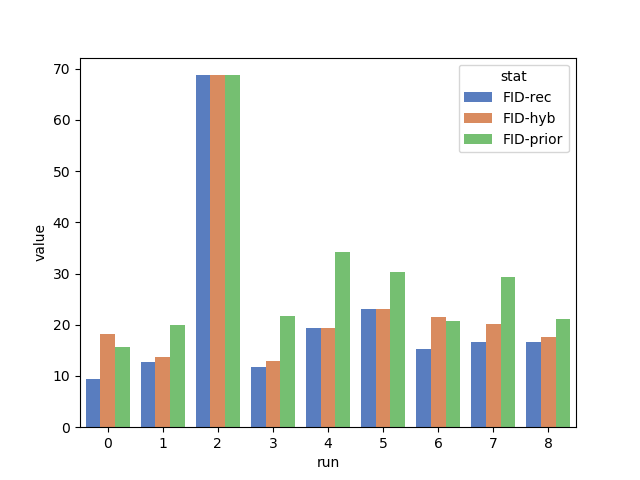

In [41]:
fig, ax = M.plot_stats('FID-rec','FID-hyb','FID-prior')
M.show()
# plt.ylim(110,150)
fig

In [61]:
# fig, ax = M.plot_stats('active_dim', )#'FVAE-active')
# M.show()
# fig

In [62]:
# fig, ax = M.plot_stats('FID-gap')
# M.show()
# fig

In [63]:
fig, ax = M.plot_stats('DCI-d', 'IRS', 'MIG',)# 'FID-gap')
M.show()
fig

KeyError: "None of [Index(['DCI-d', 'IRS', 'MIG'], dtype='object')] are in the [columns]"

In [ ]:
# fig, ax = M.plot_stats('DCI-d', 'DCI-c', 'DCI-i')
# M.show()
# fig

In [ ]:
run.results['intervention_diffs'].shape

0) pacman-wae

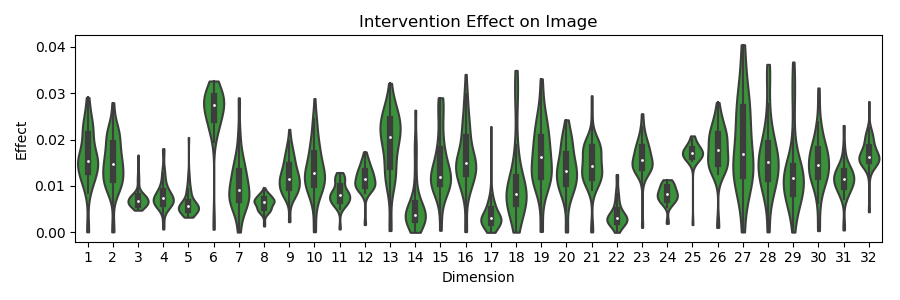

1) pacman-vae

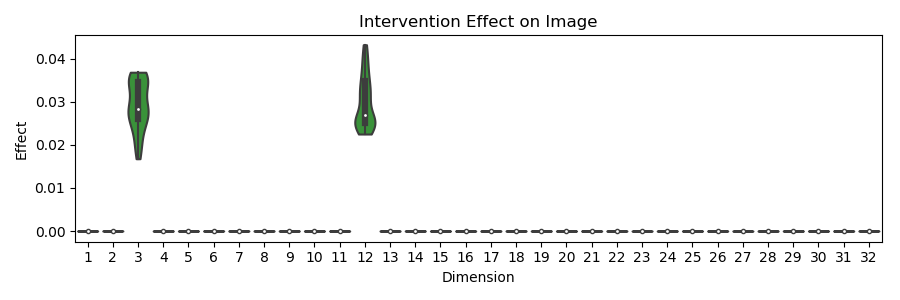

2) pacman-16vae

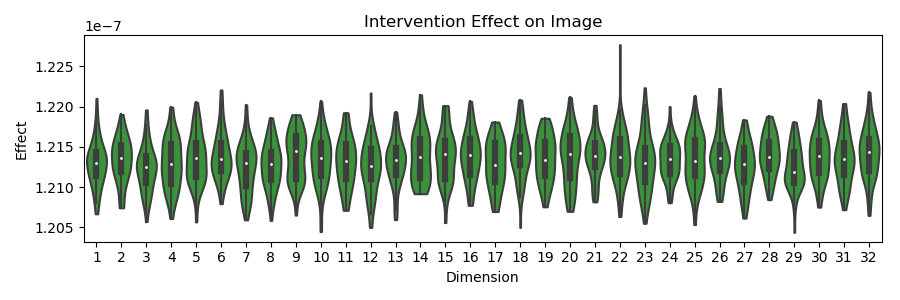

3) pacman-fwae

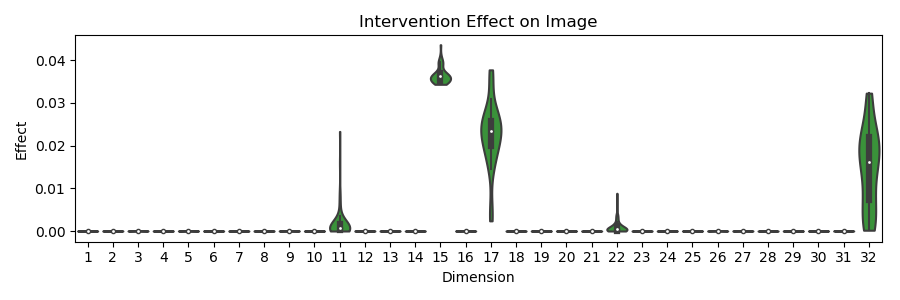

4) pacman-fwaes

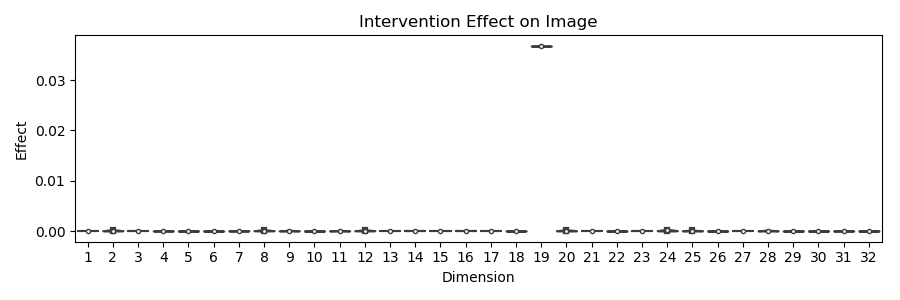

5) pacman-dvae

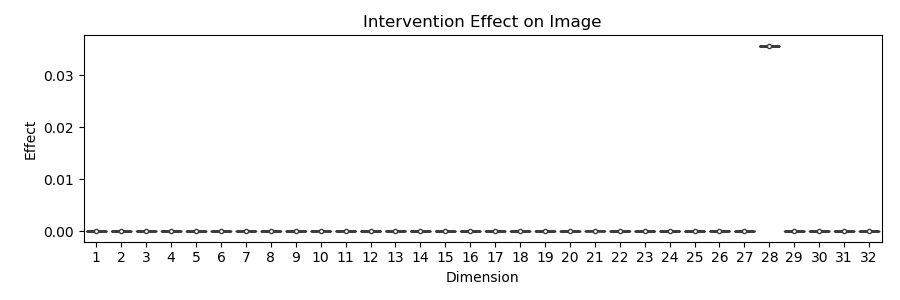

6) pacman-dwae

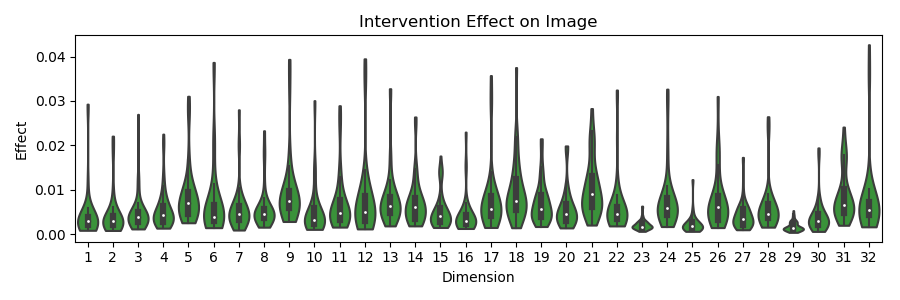

7) pacman-fdwae

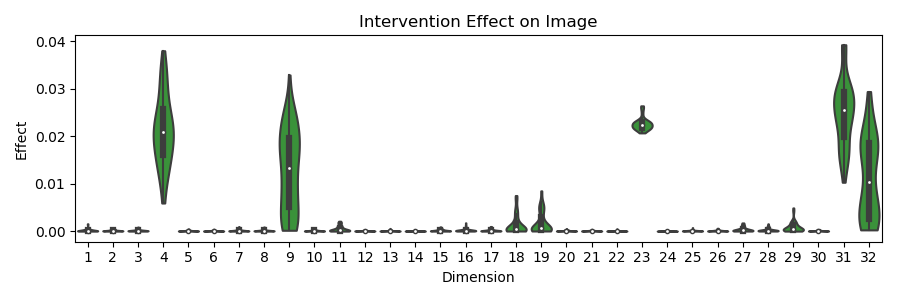

8) pacman-fdwae.1

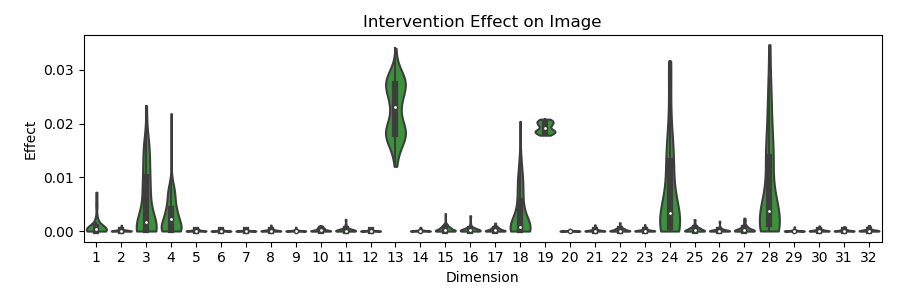

In [42]:
def _view(run):
    path = os.path.join(run.path, 'viz', 'interventions.png')
    if os.path.isfile(path):
        return disp.Image(filename=path)
    pass
imgs = M.map(_view)
# M.show()
data = zip(map(disp.Pretty, ['{}) {}'.format(i,n) for i,n in enumerate(M.through().name)]), imgs)
data = sum(map(list,data), [])
disp.display(*data)

0) pacman-wae

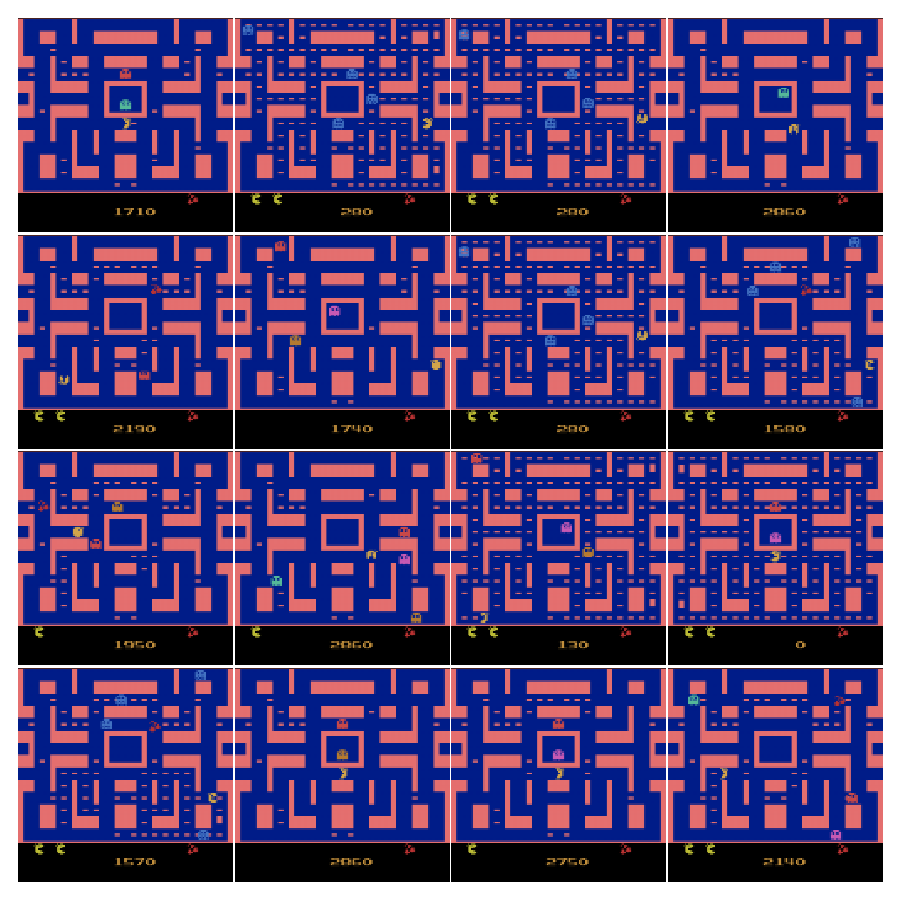

1) pacman-vae

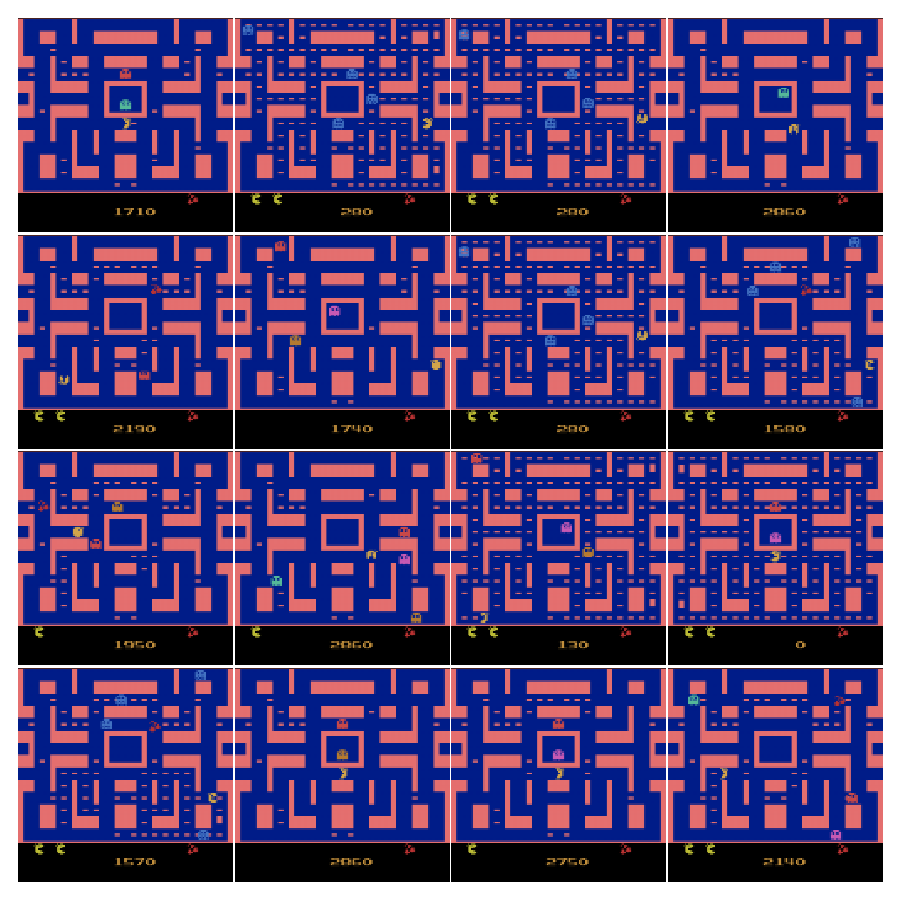

2) pacman-16vae

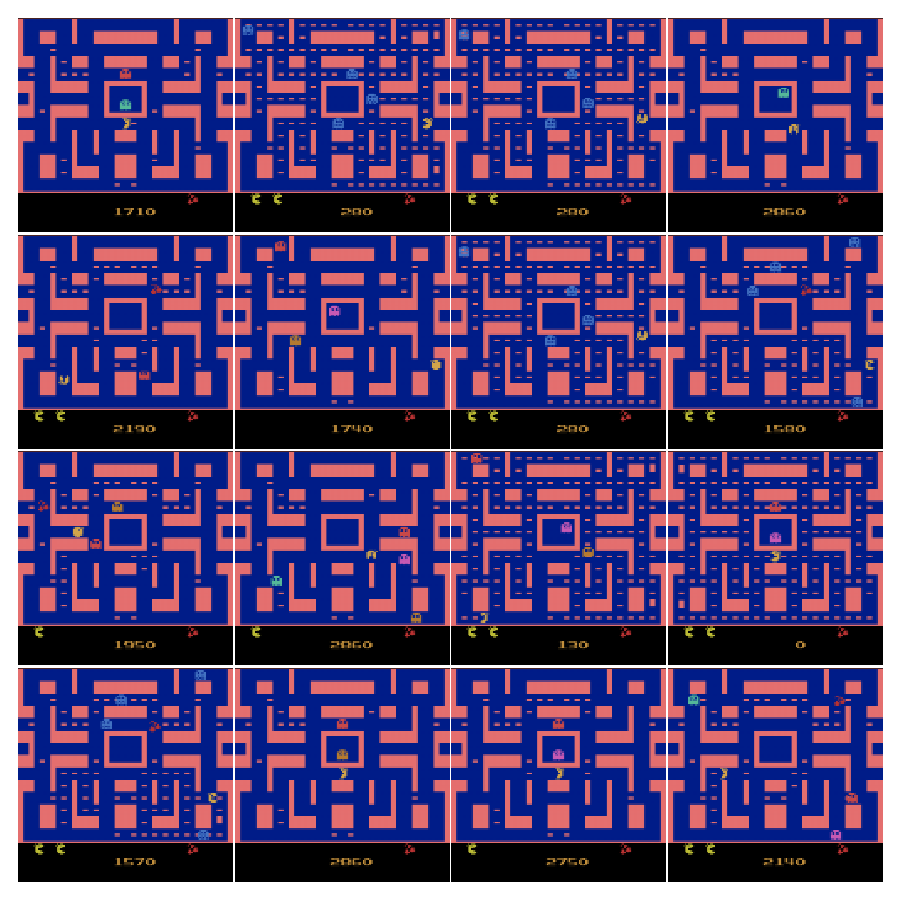

3) pacman-fwae

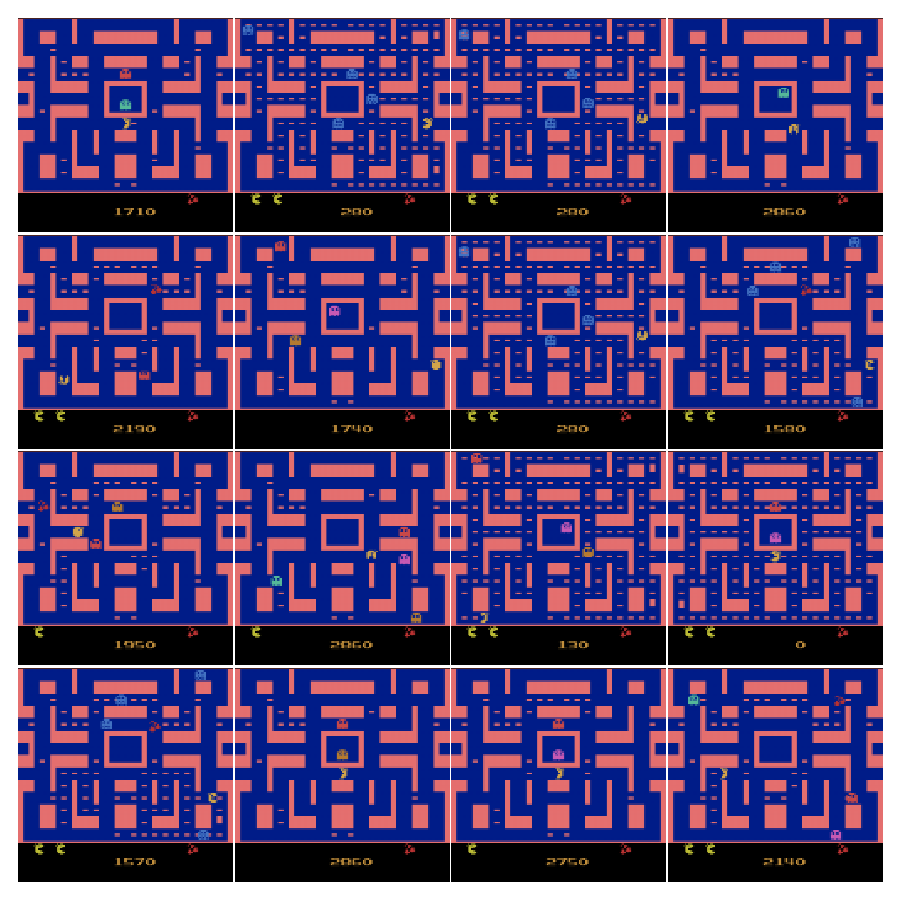

4) pacman-fwaes

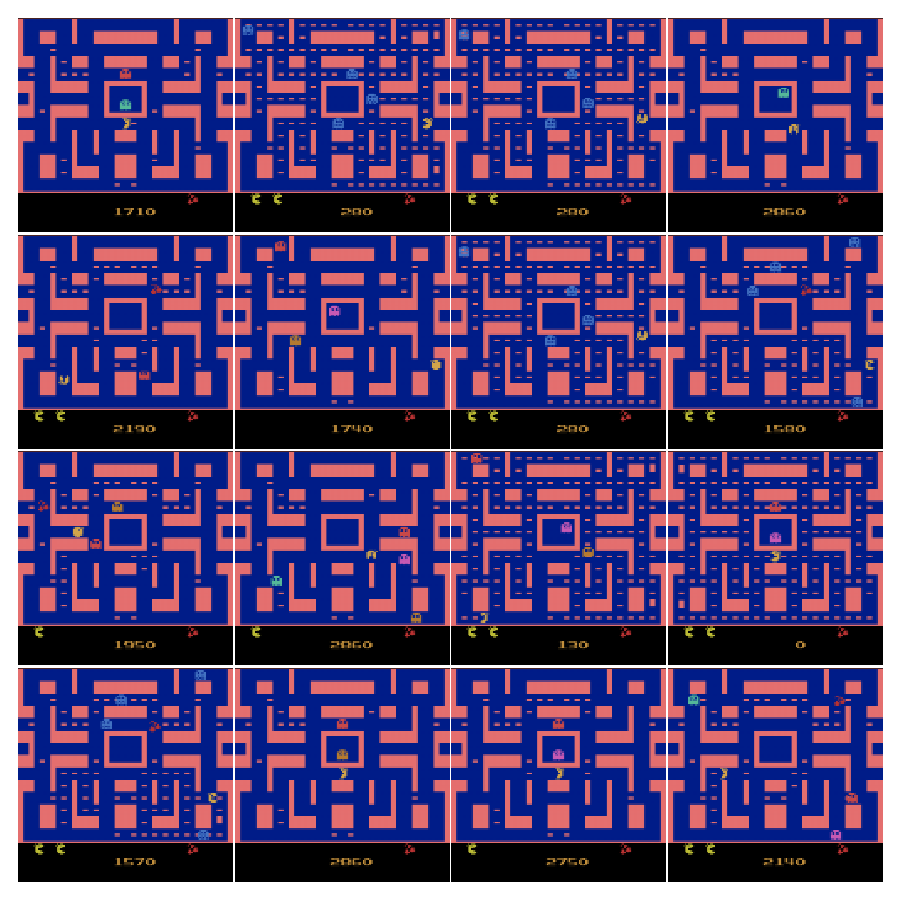

5) pacman-dvae

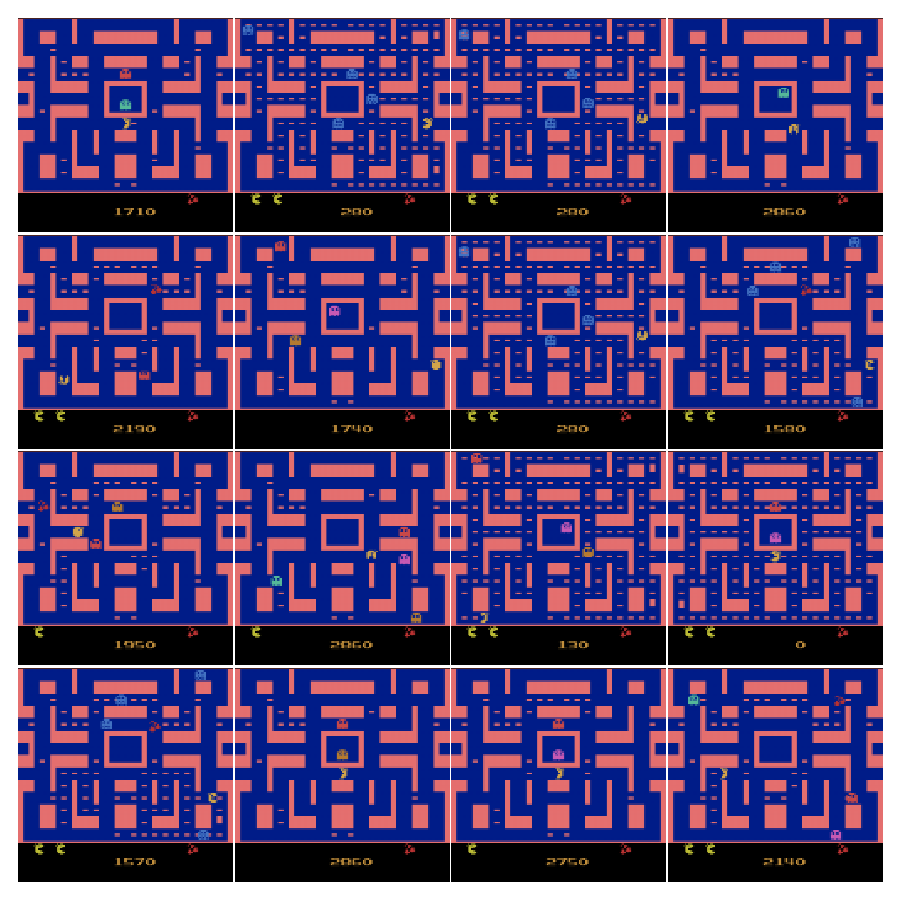

6) pacman-dwae

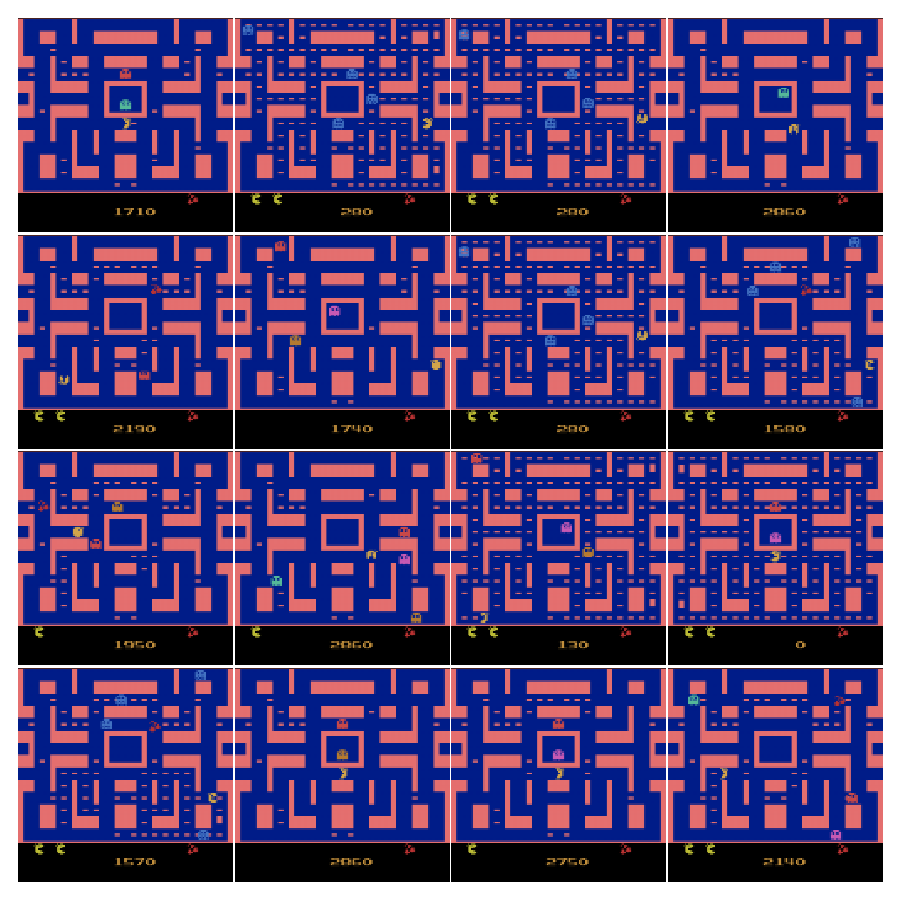

7) pacman-fdwae

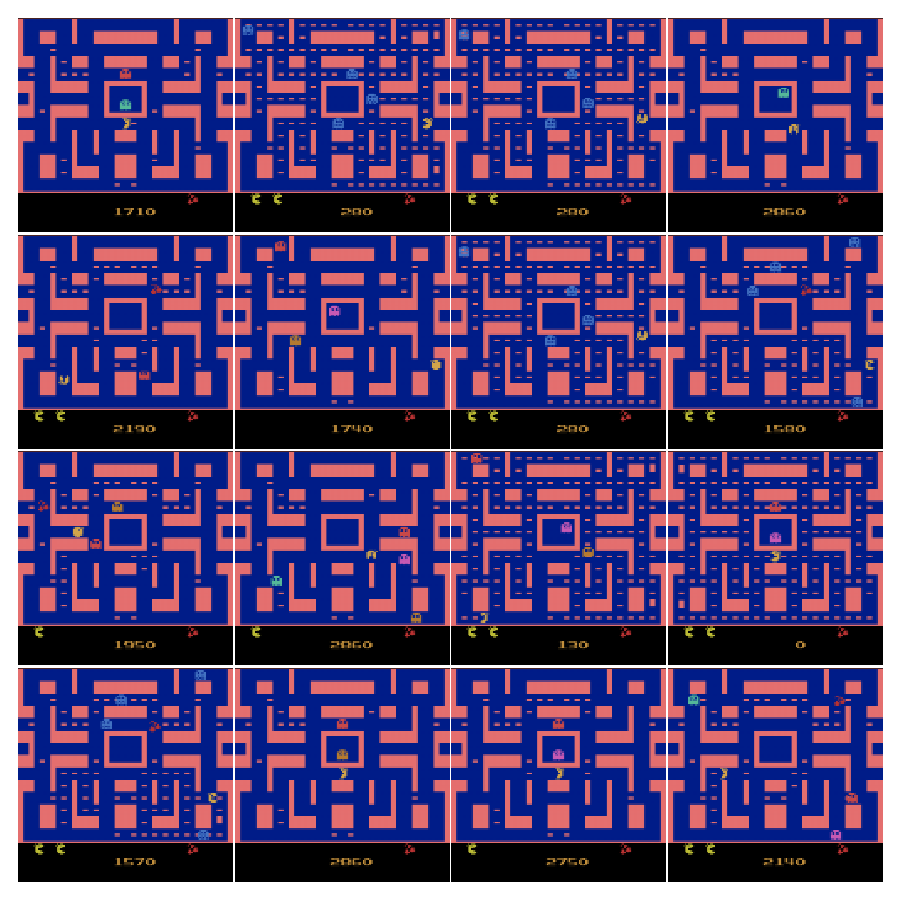

8) pacman-fdwae.1

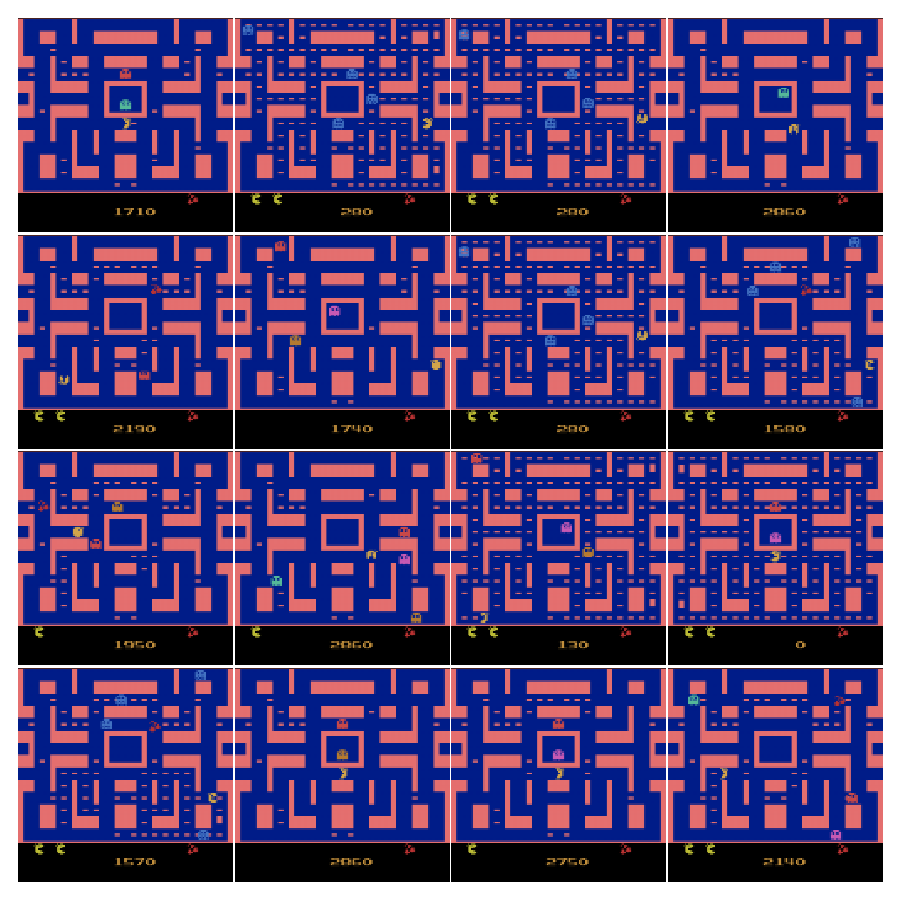

In [43]:
def _view(run):
    path = os.path.join(run.path, 'viz', 'originals.png')
    if os.path.isfile(path):
        return disp.Image(filename=path)
    pass
imgs = M.map(_view)
# M.show()
data = zip(map(disp.Pretty, ['{}) {}'.format(i,n) for i,n in enumerate(M.through().name)]), imgs)
data = sum(map(list,data), [])
disp.display(*data)

0) pacman-wae

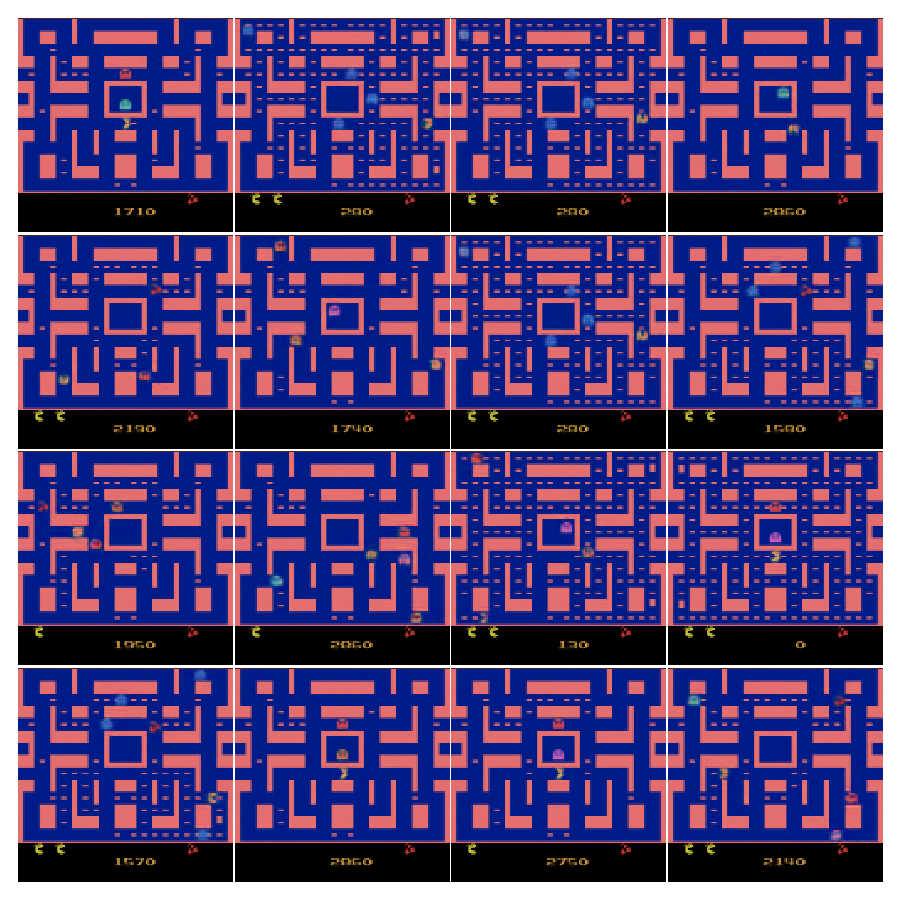

1) pacman-vae

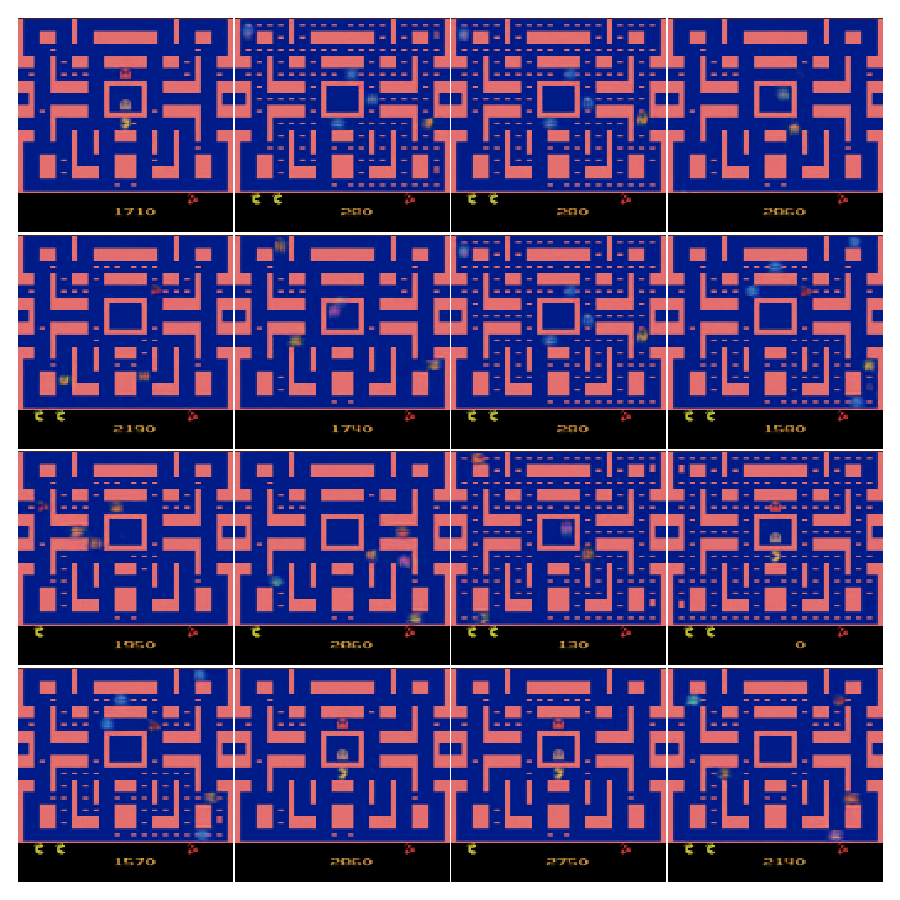

2) pacman-16vae

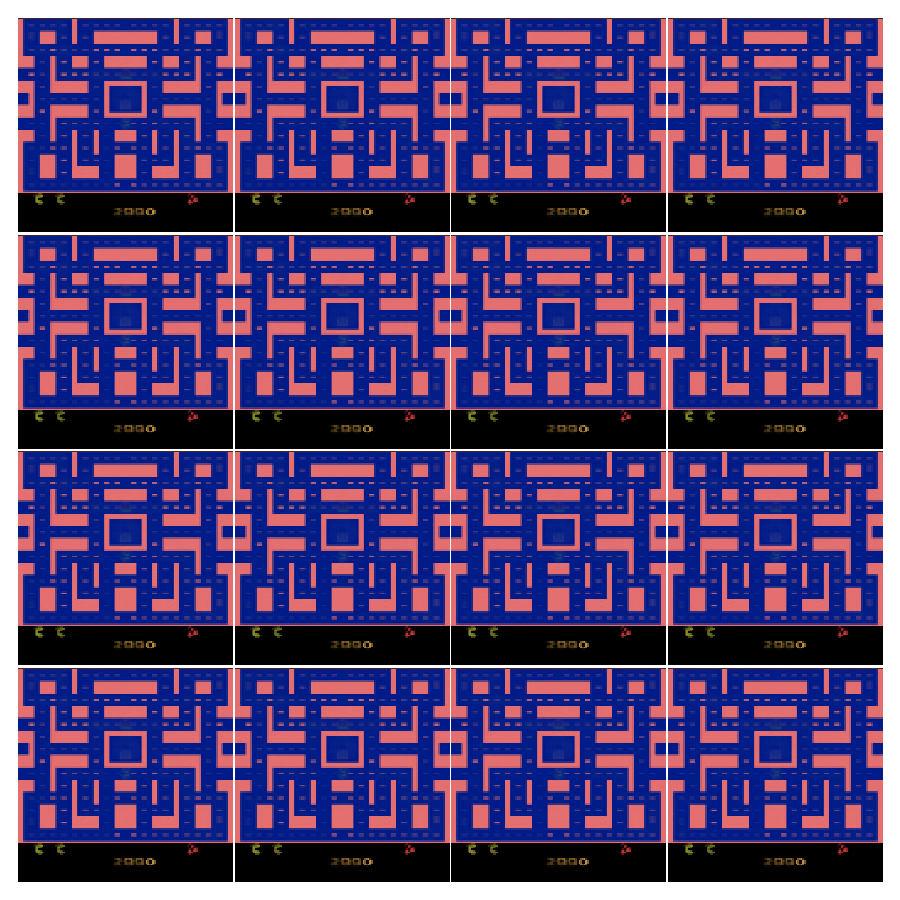

3) pacman-fwae

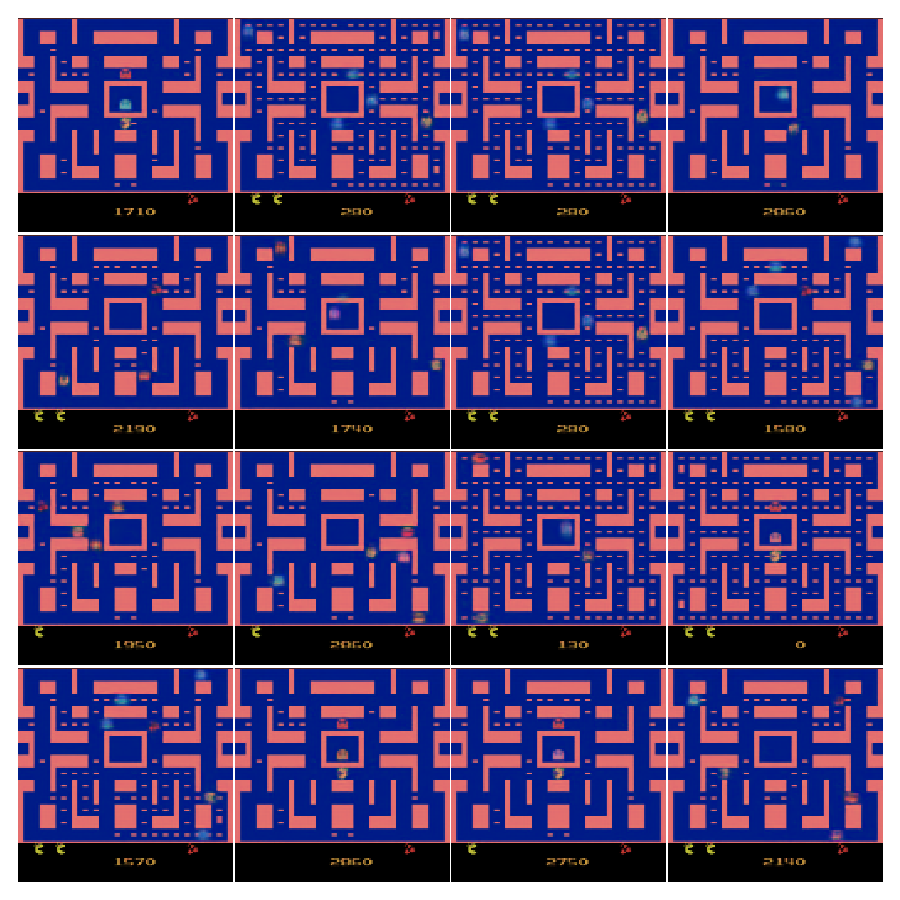

4) pacman-fwaes

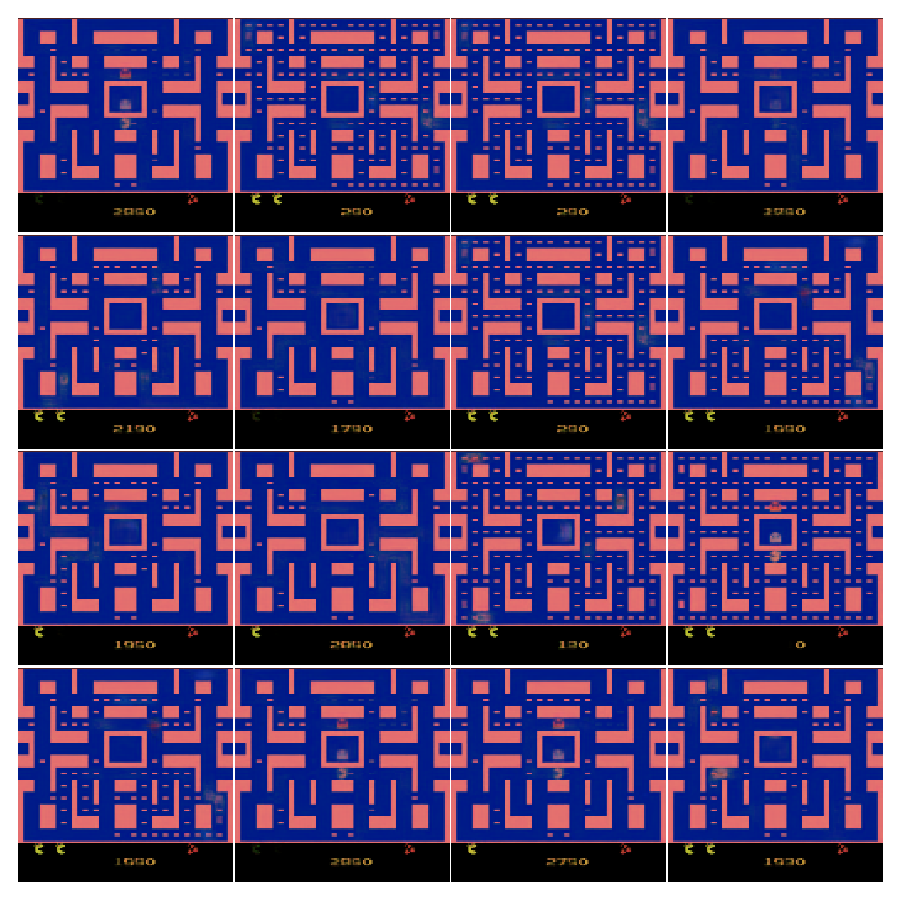

5) pacman-dvae

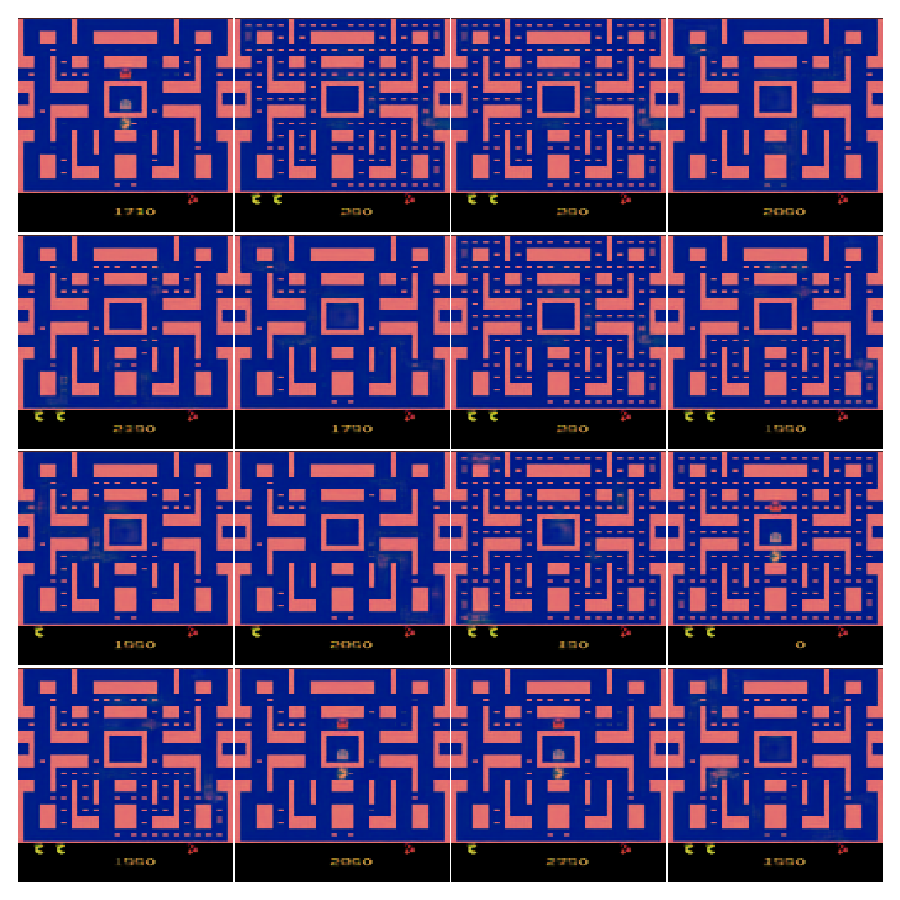

6) pacman-dwae

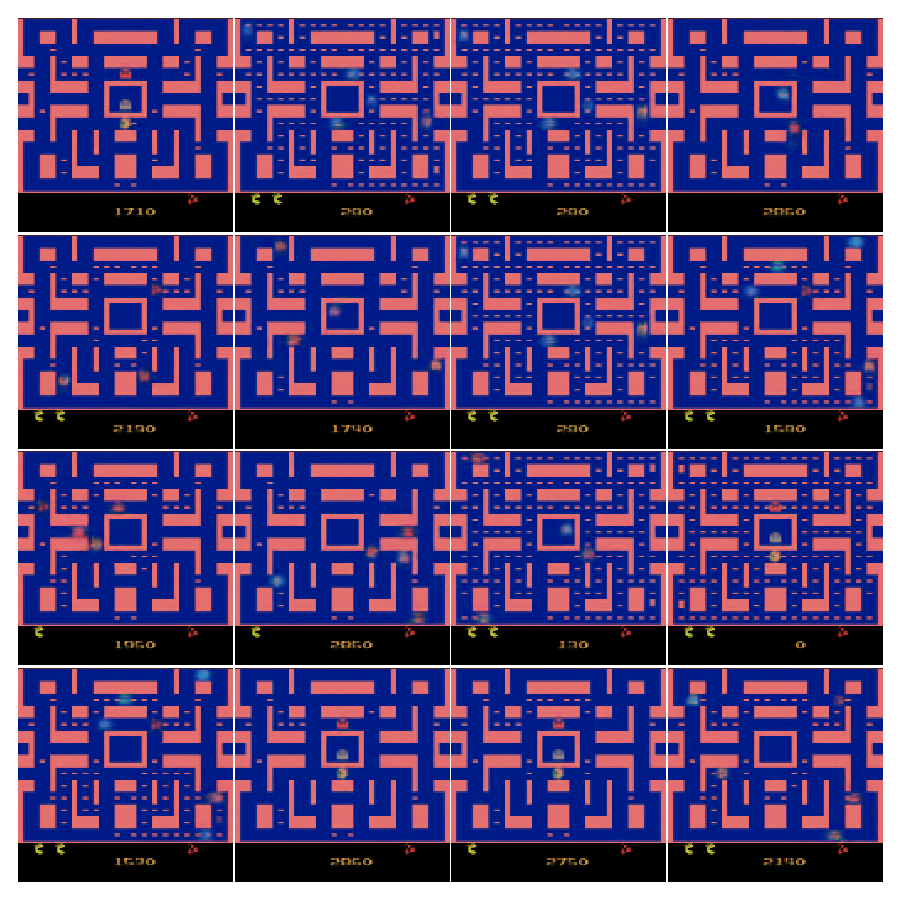

7) pacman-fdwae

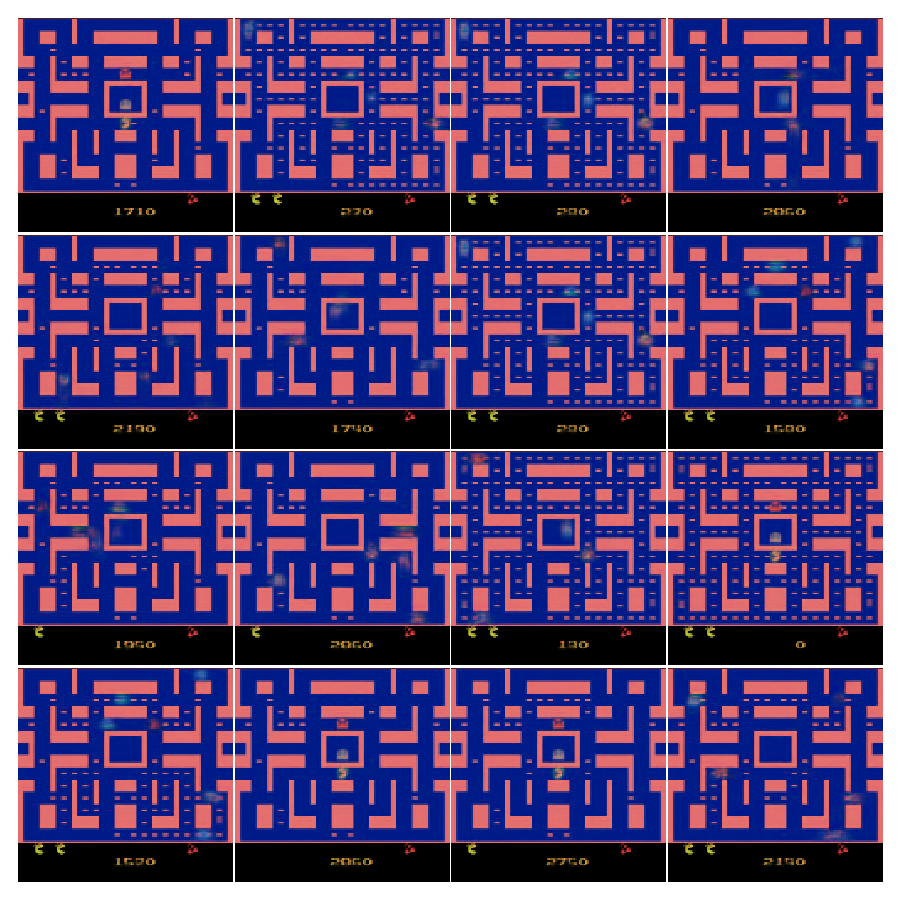

8) pacman-fdwae.1

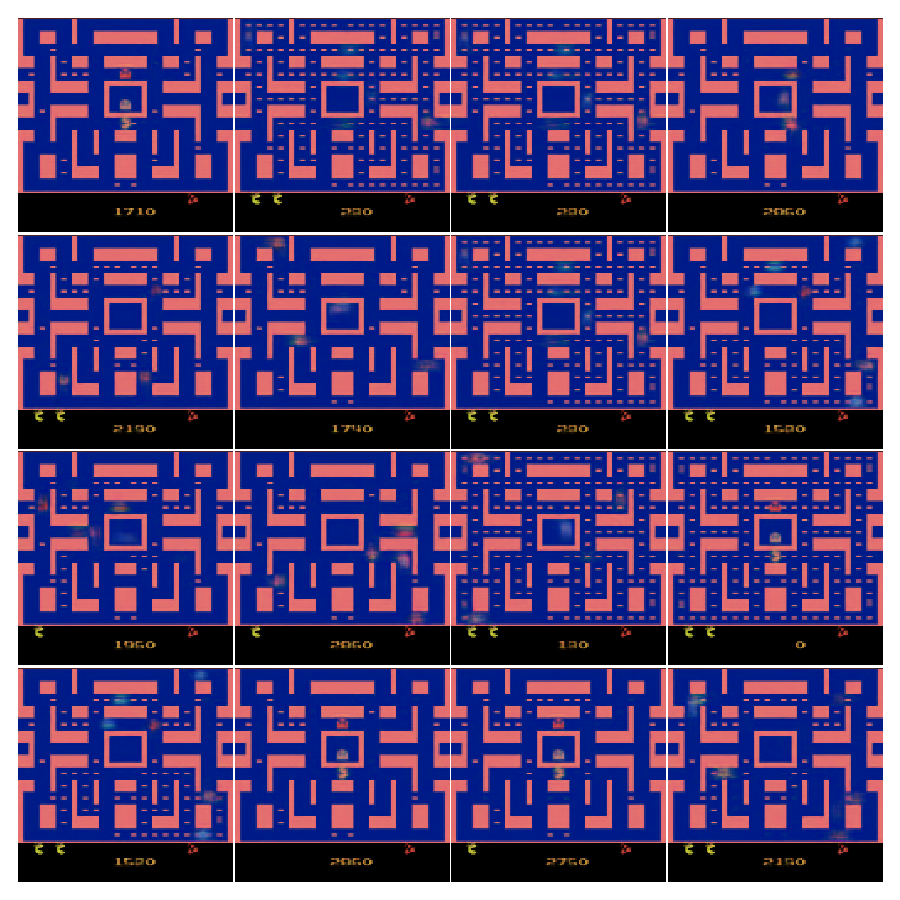

In [44]:
def _view(run):
    path = os.path.join(run.path, 'viz', 'recs.png')
    if os.path.isfile(path):
        return disp.Image(filename=path)
    pass
imgs = M.map(_view)
# M.show()
data = zip(map(disp.Pretty, ['{}) {}'.format(i,n) for i,n in enumerate(M.through().name)]), imgs)
data = sum(map(list,data), [])
disp.display(*data)

In [45]:
def _view(run):
    path = os.path.join(run.path, 'viz', 'traversals', 'walk1.mp4')
    if os.path.isfile(path):
        return disp.Video(path, embed=True, height=300)
    pass
imgs = M.map(_view)
# M.show()
data = imgs
data = zip(map(disp.Pretty, ['{}) {}'.format(i,n) for i,n in enumerate(M.through().name)]), imgs)
data = sum(map(list,data), [])
disp.display(*data, )#autoplay=1)

0) pacman-wae

None

1) pacman-vae

2) pacman-16vae

3) pacman-fwae

4) pacman-fwaes

5) pacman-dvae

6) pacman-dwae

7) pacman-fdwae

8) pacman-fdwae.1